In [1]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Yelp-Project").getOrCreate()
SparkSession.builder.enableHiveSupport()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/03/18 02:35:07 INFO org.apache.spark.SparkEnv: Registering MapOutputTracker
23/03/18 02:35:07 INFO org.apache.spark.SparkEnv: Registering BlockManagerMaster
23/03/18 02:35:08 INFO org.apache.spark.SparkEnv: Registering BlockManagerMasterHeartbeat
23/03/18 02:35:08 INFO org.apache.spark.SparkEnv: Registering OutputCommitCoordinator


In [2]:
import pyspark.sql.functions as F

In [3]:
df_business = spark.read.table("yelp_database.business")
df_business.printSchema()

ivysettings.xml file not found in HIVE_HOME or HIVE_CONF_DIR,/etc/hive/conf.dist/ivysettings.xml will be used


root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

23/03/18 02:35:37 WARN org.apache.spark.sql.catalyst.util.package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [4]:
df_business.summary().show()

+-------+-----------------+--------------------+--------------------+-----------+------------------+-----------------+-----------------+--------------------+------------------+------------------+-----------------+------+
|summary|          address|         business_id|          categories|       city|           is_open|         latitude|        longitude|                name|       postal_code|      review_count|            stars| state|
+-------+-----------------+--------------------+--------------------+-----------+------------------+-----------------+-----------------+--------------------+------------------+------------------+-----------------+------+
|  count|           117618|              117618|              117618|     117618|            117618|           117618|           117618|              117618|            117618|            117618|           117618|117618|
|   mean|7369.333333333333|                null|                null|       null|  0.80749545137649|36.6123075228026

In [5]:
# df_business.show(100).toPandas()

In [6]:
df_business.summary().toPandas()

,summary,address,business_id,categories,city,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,count,117618,117618,117618,117618,117618,117618,117618,117618,117618,117618,117618,117618
1,mean,7369.333333333333,None,None,None,0.80749545137649,36.61230752280268,-89.2776790545241,1252.4,45168.511811509285,52.95823768470812,3.659320852250506,None
2,stddev,8738.777641447725,None,None,None,0.3942687776328454,5.838799887914954,14.8046581497357,811.1275005954503,26259.903893187387,135.12669351350556,0.932171202434001,None
3,min,,---kPU91CF4Lq2-WlRu9Lw,"3D Printing, Local Services, Hobby Shops, Shop...",AB Edmonton,0,27.555127,-120.095137,Grow Academy,,5,1.0,AB
4,25%,850.0,None,None,None,1,32.1729659,-90.3498049,360.0,19355.0,9,3.0,None
5,50%,3070.0,None,None,None,1,38.7308644,-86.120209,1500.0,37064.0,18,4.0,None
6,75%,11964.0,None,None,None,1,39.953487,-75.45019,1899.0,70002.0,46,4.5,None
7,max,​185 E State St,zzyx5x0Z7xXWWvWnZFuxlQ,"Zoos, Tours, Arts & Entertainment, Hotels & Tr...",​Largo,1,53.6518378,-73.2004570502,​Silent Stay Meditation & Retreat Center,T9E 0V3,7568,5.0,WA


In [7]:
df_business.groupBy('city').count().sort(F.col('count').desc()).show()

+----------------+-----+
|            city|count|
+----------------+-----+
|    Philadelphia|11070|
|          Tucson| 7268|
|           Tampa| 7264|
|    Indianapolis| 5878|
|       Nashville| 5529|
|     New Orleans| 4734|
|            Reno| 4469|
|        Edmonton| 3710|
|     Saint Louis| 3687|
|   Santa Barbara| 2913|
|           Boise| 2338|
|      Clearwater| 1756|
|        Metairie| 1331|
|Saint Petersburg| 1277|
|          Sparks| 1272|
|        Franklin| 1138|
|      Wilmington| 1113|
|       St. Louis| 1110|
|  St. Petersburg|  942|
|        Meridian|  849|
+----------------+-----+
only showing top 20 rows



In [8]:
Phi_business = df_business.filter('city== "Philadelphia" ')

In [9]:
Phi_restaurant = Phi_business.filter((F.col('categories').contains("Restaurants")))

In [10]:
Phi_restaurant.show(10,True)

+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|             address|          attributes|         business_id|          categories|        city|               hours|is_open|     latitude|     longitude|                name|postal_code|review_count|stars|state|
+--------------------+--------------------+--------------------+--------------------+------------+--------------------+-------+-------------+--------------+--------------------+-----------+------------+-----+-----+
|         935 Race St|{null, null, u'no...|MTSW4McQd7CbVtyjq...|Restaurants, Food...|Philadelphia|{7:0-21:0, 7:0-20...|      1|   39.9555052|   -75.1555641|  St Honore Pastries|      19107|          80|  4.0|   PA|
|         205 Race St|{null, null, 'ful...|MUTTqe8uqyMdBl186...|Sushi Bars, Resta...|Philadelphia|{13:30-23:0, null...|      1|    39.953949

## Keep relevant column
only keep some useful columns
* business_id
* name
* categories
* stars

In [11]:
col_keep = ['business_id','name','categories','stars']
Phi_restaurant=Phi_restaurant[col_keep]

In [12]:
Phi_restaurant.show(10)

+--------------------+--------------------+--------------------+-----+
|         business_id|                name|          categories|stars|
+--------------------+--------------------+--------------------+-----+
|MTSW4McQd7CbVtyjq...|  St Honore Pastries|Restaurants, Food...|  4.0|
|MUTTqe8uqyMdBl186...|            Tuna Bar|Sushi Bars, Resta...|  4.0|
|ROeacJQwBeh05Rqg7...|                 BAP| Korean, Restaurants|  4.5|
|QdN72BWoyFypdGJhh...|             Bar One|Cocktail Bars, Ba...|  4.0|
|Mjboz24M9NlBeiOJK...|    DeSandro on Main|Pizza, Restaurant...|  3.0|
|aPNXGTDkf-4bjhyMB...|          Craft Hall|Eatertainment, Ar...|  3.5|
|ppFCk9aQkM338Rgwp...|                Wawa|Restaurants, Auto...|  3.0|
|3BJxm-HnvzdwD1zjm...|Golden Chopstick ...|Restaurants, Chinese|  3.0|
|WYYdQDjx-DsCanlP0...|             J Sushi|Seafood, Restaura...|  4.5|
|O1oZpbZNDMH_gz8Dh...|             Wendy's|Burgers, Restaura...|  1.5|
+--------------------+--------------------+--------------------+-----+
only s

## Join review data

We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained.

* Prepare dataframes to be joined --- on business_id

In [13]:
df_review=spark.read.table("yelp_database.review")

In [14]:
df_review.show(10)

+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|znK6tMeegKf9YnGut...|   0|2021-04-16 22:02:21|    0|MmmrqbdupYBJq9jnl...|  5.0|Great little spot...|     0|TjD2S66AWxlKsPSQB...|
|UxwpCVLgPWCeaRyet...|   0|2021-01-03 21:54:48|    0|1_uWX0bBJNnZjPEcp...|  5.0|James was super k...|     0|Vtfxxq3nxdYHRiH6O...|
|eVI64EQymywsvMLmD...|   0|2020-11-01 19:50:03|    0|WVAEE47MnM3Sv2cvM...|  5.0|By far the best i...|     0|ZDw_qN5Fy6PE0gdbV...|
|SPcPJfPgWzhjUDqVF...|   0|2021-03-24 05:53:49|    0|D5b6iooZZcJ8nG-9P...|  5.0|I thought that th...|     0|UvMDlX2wV4Md9OwGW...|
|T5XzQ6YnVExvd0BOR...|   0|2016-06-13 21:25:10|    0|uDxnT7zWFnxEDxp5e...|  5.0|Aside from

In [15]:
df_Phi_restaurant_new = Phi_restaurant.join(df_review,['business_id'],'inner')

In [16]:
df_Phi_restaurant_new.show(10)

+--------------------+--------------------+--------------------+-----+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|         business_id|                name|          categories|stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|
+--------------------+--------------------+--------------------+-----+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+
|u7cZUEGK6iJP2gvI2...|     Memphis Taproom|Bars, Restaurants...|  4.0|   0|2013-01-24 14:36:59|    0|CDilyHXE5ij20b2Ri...|  4.0|Outstanding tap l...|     1|FUUEU3ZN5cL1nNNR2...|
|GWH_fPOdtIjFZT4-X...|        Eat At Joe's|Fast Food, Breakf...|  2.0|   0|2014-01-03 01:54:16|    0|FoUNHWn9_4V2nZVH9...|  1.0|You know you're i...|     4|LY_YVPuJogpjX2MSa...|
|p-MSh95si_sDdih94...|           Forsythia|Restaurants, Fren...|  4.5|   0|2021-05-15 01:07:10|    0|WK4syNkN0

In [17]:
df_Phi_restaurant_new.summary().toPandas()

,summary,business_id,name,categories,stars,cool,date,funny,review_id,stars,text,useful,user_id
0,count,662473,662473,662473,662473,662473,662473,662473,662473,662473,662473,662473,662473
1,mean,None,559.7400881057268,None,3.818016734266906,0.5485431104361989,None,0.3667364556744199,None,3.826383867719892,None,1.096148824178495,None
2,stddev,None,574.6348192632663,None,0.5628930006239539,1.8567562332183871,None,1.4265071503997058,None,1.3000416190490796,None,2.538471425933532,None
3,min,-0M0b-XhtFagyLmsBtOe8w,&pizza - UPenn,"Active Life, Beer Gardens, Grocery, Middle Eas...",1.0,0,2005-02-16 04:06:26,0,---aZVSWnQtOP_12QzIt8g,1.0,! Came by with friends after they ran the Broa...,0,---r61b7EpVPkb4UVme5tA
4,25%,None,24.0,None,3.5,0,None,0,None,3.0,None,0,None
5,50%,None,24.0,None,4.0,0,None,0,None,4.0,None,0,None
6,75%,None,943.0,None,4.0,1,None,0,None,5.0,None,1,None
7,max,zzyx5x0Z7xXWWvWnZFuxlQ,¡Juice!,"Wraps, Sandwiches, Restaurants, Delis, Breakfa...",5.0,163,2022-01-19 19:46:34,227,zzzsujjXnH7MNLW2XYVf1A,5.0,＼(^o^)／\nThey have a different taste than most...,224,zzzMBVS73g3ZJ7qL8JyhiA


In [18]:
df_Phi_restaurant_new.select('date').show()

+-------------------+
|               date|
+-------------------+
|2013-01-24 14:36:59|
|2014-01-03 01:54:16|
|2021-05-15 01:07:10|
|2020-02-18 05:54:00|
|2020-10-25 11:54:03|
|2021-05-21 01:05:45|
|2021-09-06 05:16:08|
|2021-06-13 23:18:56|
|2019-04-20 19:19:53|
|2020-10-09 14:55:30|
|2021-01-31 20:25:02|
|2021-07-02 02:41:01|
|2019-04-16 13:40:10|
|2021-07-13 18:10:27|
|2016-03-28 20:45:52|
|2021-10-20 23:08:38|
|2021-08-02 17:38:07|
|2021-03-01 14:50:46|
|2021-04-23 17:21:10|
|2021-01-12 00:02:52|
+-------------------+
only showing top 20 rows



In [19]:
df_Phi_restaurant_new = df_Phi_restaurant_new.withColumn("datetime",F.to_timestamp(F.col('date'),'yyyy-MM-dd HH:mm:ss'))

In [20]:
df_Phi_restaurant_new = df_Phi_restaurant_new.filter(F.col('datetime') > "2020-01-01")

In [21]:
df_Phi_restaurant_new.show(2,True)

+--------------------+--------------------+--------------------+-----+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+-------------------+
|         business_id|                name|          categories|stars|cool|               date|funny|           review_id|stars|                text|useful|             user_id|           datetime|
+--------------------+--------------------+--------------------+-----+----+-------------------+-----+--------------------+-----+--------------------+------+--------------------+-------------------+
|p-MSh95si_sDdih94...|           Forsythia|Restaurants, Fren...|  4.5|   0|2021-05-15 01:07:10|    0|WK4syNkN0puOr6Yju...|  5.0|Beautiful place t...|     0|oN2GmKS7jRjunWGNk...|2021-05-15 01:07:10|
|pDUcsN79bDwhOMBaD...|Cafe Pho Ga Thanh...|Food, Asian Fusio...|  4.0|   0|2020-02-18 05:54:00|    0|6kwktNYRib2oWHNHa...|  3.0|The place is supe...|     0|u5ueF05YmDkxQ-Yb9...|2020-02-18 05:54:00|
+---------

In [23]:
pdf_Phi_restaurant_new=df_Phi_restaurant_new.toPandas()

In [44]:
review_counts_by_business_entity = df_Phi_restaurant_new.groupby('name').size().sort_values()

In [46]:
review_counts_by_business_entity

name
Foodery                             1
Crisp Kitchen                       1
Pizza Rustica                       1
Pizza Power                         1
Pizza Point                         1
                                 ... 
Suraya                            343
Sabrina's Café                    360
Parc                              400
Dalessandro’s Steaks & Hoagies    493
Reading Terminal Market           501
Length: 2783, dtype: int64

In [47]:
review_counts_by_business_entity_top10_name=review_counts_by_business_entity[-10:].index

In [54]:
review_counts_top_10_name = df_Phi_restaurant_new[df_Phi_restaurant_new['name'].isin(pdf_review_counts_by_business_entity_top10_name)]

In [57]:
review_counts_top_10_name = review_counts_top_10_name.groupby('name').size().sort_values()

In [58]:
review_counts_top_10_name

Series([], dtype: int64)

IndexError: index 0 is out of bounds for axis 0 with size 0

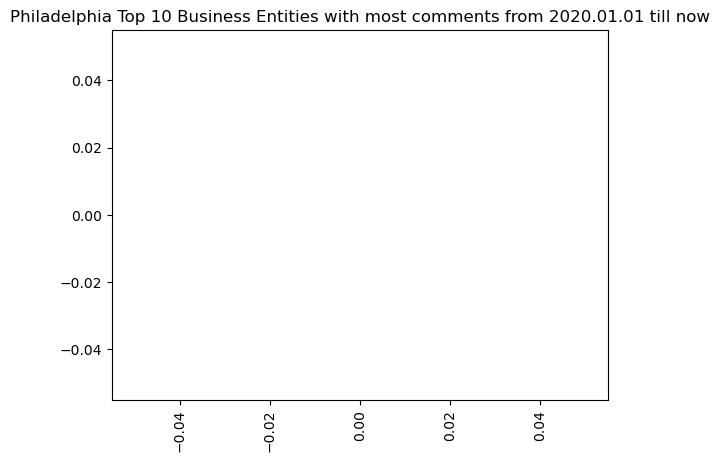

In [59]:
review_counts_top_10_name.plot.bar(title='Philadelphia Top 10 Business Entities with most comments from 2020.01.01 till now')